<h3><center><b>Свирин Максим Сергеевич | Б19-501</b></center></h3>

<center>Будем искать численное решение уравнения теплопроводности:</center>

$$
\begin{cases}
u_t=a^2u_{xx}+f(x,t)
\\
u(x,0)=\phi(x)
\\
\alpha_{1}u_x(0,t)+\beta_{1}u(0,t)=\gamma_{1}
\\
\alpha_{2}u_x(l,t)+\beta_{2}u(l,t)=\gamma_{2}
\end{cases}
$$

---

<center>Для решения будет использована разностная схема с весами:</center><br/>

<center><img width="40%" height="40%" src="./src/scheme.svg" class="edge"></center>

$$
\begin{cases}
\frac{u_k^{n+1} - u_k^n}{\tau} = a^2 \cdot \frac{1}{h^2} \bigg( \sigma \Big( u_{k+1}^{n+1} - 2u_{k}^{n+1} + u_{k-1}^{n+1} \Big) + (1-\sigma) \Big( u_{k+1}^{n} - 2u_{k}^{n} + u_{k-1}^{n} \Big) \bigg) + f_{k}^{n+\frac{1}{2}}
\\
u_{k}^{0}=\phi_{k}=\phi(x=x_k)
\\
\alpha_{1} \frac{u_{1}^{n+1} - u_{0}^{n+1}}{h} +\beta_{1}u_{0}^{n+1}=\gamma_{1}
\\
\alpha_{2} \frac{u_{M}^{n+1} - u_{M-1}^{n+1}}{h} +\beta_{2}u_{M}^{n+1}=\gamma_{2}
\end{cases}
$$

Проведём некоторые преобразования и получим:

$$
\begin{cases}
u_{k+1}^{n+1}\left( \frac{a^2\tau\sigma}{h^2} \right) + u_{k}^{n+1} \left( -\frac{2a^2\tau\sigma}{h^2} - 1 \right) + u_{k-1}^{n+1} \left( \frac{a^2\tau\sigma}{h^2} \right) = - u_{k}^{n} - \tau f_{k}^{n+\frac{1}{2}} + (\sigma - 1) \frac{a^2\tau}{h^2} \left( u_{k+1}^{n} - 2u_{k}^{n} + u_{k-1}^{n} \right)
\\
u_{k}^{0}=\phi_{k}
\\
u_{0}^{n+1} \left( - \frac{\alpha_{1}}{h} + \beta_{1} \right) + u_{1}^{n+1} \frac{\alpha_{1}}{h}  = \gamma_{1} = d_0
\\
u_{M}^{n+1} \left( \frac{\alpha_{2}}{h} + \beta_{2} \right) + u_{M-1}^{n+1} \left( - \frac{\alpha_{2}}{h} \right)  = \gamma_{2} = d_M

\end{cases}
$$

---

Переобозначим коэффициенты:

Для $k=\overline{1,M-1}$:
$$
\begin{cases}
a_k = \frac{a^2\tau\sigma}{h^2}
\\
b_k = -\frac{2a^2\tau\sigma}{h^2} - 1
\\
c_k = \frac{a^2\tau\sigma}{h^2}
\\
d_k = - u_{k}^{n} - \tau f_{k}^{n+\frac{1}{2}} + (\sigma - 1) \frac{a^2\tau}{h^2} \left( u_{k+1}^{n} - 2u_{k}^{n} + u_{k-1}^{n} \right)
\end{cases}
$$

Для остальных k:
$$
\begin{cases}
a_0 = 0
\\
b_0 = - \frac{\alpha_{1}}{h} + \beta_{1}
\\
c_0 = \frac{\alpha_{1}}{h}
\\
d_0 = \gamma_{1}
\\
a_M = - \frac{\alpha_{2}}{h}
\\
b_M = \frac{\alpha_{2}}{h} + \beta_{2}
\\
c_M = 0
\\
d_M = \gamma_{2}
\end{cases}
$$

После переобозначения имеем:
$$
\begin{cases}
u_{k+1}^{n+1} a_k + u_{k}^{n+1} b_k + u_{k-1}^{n+1} c_k = d_k \qquad  k=\overline{1,M-1}
\\
u_{k}^{0}=\phi_{k}
\\
u_{0}^{n+1} b_0 + u_{1}^{n+1} c_0 = d_0
\\
u_{M-1}^{n+1} a_M + u_{0}^{n+1} b_M = d_M

\end{cases}
$$

---

Составим матрицу из полученных уравнений:

$$\begin{pmatrix}
b_0 & c_0 & & & \\
a_1 & b_1 & c_1 & & \\
& a_2 & \ddots & \ddots & \\
& & \ddots & \ddots & c_{M-1} \\
& & & a_M & b_M \\
\end{pmatrix}
\begin{pmatrix}
u_0^{n+1} \\
u_1^{n+1} \\
u_2^{n+1} \\
\dots \\
u_M^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
d_0 \\
d_1 \\
d_2 \\
\dots \\
d_M
\end{pmatrix}$$

Мы имеем $N$ систем уравнений $(M+1) \times (M+1)$

---

<center><img width="50%" height="50%" src="./src/task.jpg"></center>

<center><img width="50%" height="50%" src="./src/14.jpg"></center>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
# import math
# import sympy
import plotly.graph_objects as gr
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d

In [49]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Зададим функции и постоянные, используемые в уравнении:

In [50]:
# Правая часть уравнения теплопроводности
def f(x, t):
    return (-3) * (1 + np.cosh(1 - x - t)**2 + np.sinh(2 - 2*x - 2*t)) / (8 * np.cosh(1 - x - t)**(3/2))

# Функкция начального условия
def phi(x):
    return 3 / 2 * np.cosh(1 - x)**(1/2)

# Граничные условия
A1 = 0
B1 = 1
C1 = lambda t: 3 / 2 * (np.cosh(1 - t))**(1/2)

A2 = -2
B2 = 1
C2 = lambda t: 3 / 2 * (np.cosh(t) - np.sinh(t)) / np.cosh(t)**(1/2)

# Параметр a уравнения
a = 1

# Настоящее решение уравнения
def solution(x, t):
    return 3 / 2 * np.cosh(1 - x - t)**(1/2)

In [51]:
# Правая часть уравнения теплопроводности
def f(x, t):
    return (2 - 8 * x**2 / 3) * np.exp(t - x*x)

# Функкция начального условия
def phi(x):
    return 2 / 3 * np.exp(-x*x)

# Граничные условия
A1 = -1
B1 = 1
C1 = lambda t: 2 / 3 * np.exp(t)

A2 = 1
B2 = 1
C2 = lambda t: -2 / 3 * np.exp(t-1)

# Параметр a уравнения
a = 1

# Настоящее решение уравнения
def solution(x, t):
    return 2 / 3 * np.exp(t - x*x)

Зададим параметры пространственно-временной сетки:

In [52]:
h = 0.05
l = 1
N = int(l / h)+1
X = np.linspace(0, l, num=N)

# T = float(input("Введите максимальное время T:\t"))
t = 1

# dt = float(input("Введите шаг временной сетки dt:\t"))
dt = 0.05

M = int(t / dt) + 1
T = np.linspace(0, t, num=M)

# Задаём сигму
sigma = 0.5

Напишем алгоритм решения системы уравнений с тридиагональной матрицей:

In [53]:
def TridiagMatrixMethod(m, u, l=l, A1=A1, B1=B1, C1=C1, A2=A2, B2=B2, C2=C2, sigma=sigma, h=h, N=N, dt=dt, X=X, T=T, f=f, order=1, type="3D"):
    
    # Функция "прямого хода" по матрице
    def forward_path(A, B, C, D, n=N-1):
        AA = [-C[0]  / B[0]]
        BB = [D[0] / B[0]]
        for i in range(1, n):
            AA.append(- C[i] / (B[i] + A[i] * AA[i-1]))
            BB.append((D[i] - A[i]*BB[i-1]) / (B[i] + A[i] * AA[i-1]))
        return AA, BB

    # Функция "обратного хода" по матрице
    def backward_path(AA, BB, n=N-1):
        Y = []
        Y.append(BB[n-1])
        for i in range(n - 2, -1, -1):
            Y.append(BB[i] + AA[i] * Y[n - i - 2])
        return Y[::-1]
    
    X = np.linspace(0, l, N)
    
    cur = a * a * dt / h / h

    A = [0]
    B = [0]
    C = [0]
    D = [0]
    
    for i in range(1, N - 1):
        A.append(cur * sigma)
        B.append((-2) * cur * sigma - 1)
        C.append(cur * sigma)
        if type=="3D":
            D.append(-u[m][i] - dt*f(X[i], T[m] + dt / 2) + (sigma - 1) * a * a * dt / h / h * (u[m][i+1] - 2 * u[m][i] + u[m][i-1]))
        elif type=="2D":
            D.append(-u[i] - dt*f(X[i], T[m] + dt / 2) + (sigma - 1) * a * a * dt / h / h * (u[i+1] - 2 * u[i] + u[i-1]))
        else:
            raise ValueError("Incorrect order of algorithm (avail.: 1, 2)")

    if order == 1:
        A[0] = (0)
        B[0] = (-A1 / h + B1)
        C[0] = (A1 / h)
        D[0] = (C1(T[m+1]))

        A.append(-A2 / h)
        B.append(A2 / h + B2)
        C.append(0)
        D.append(C2(T[m+1]))
    
    elif order == 2:
        
        A[0] = (0)
        B[0] = (A1 - h*B1 + A1 / (2*cur*sigma))
        C[0] = (-A1)
        A.append((A2))
        B.append(-(A2 + h*B2 + A2/(2*cur*sigma)))
        C.append(0)
        if type=="3D":
            D[0] = (-h*C1(T[m+1]) + A1 / (2*cur*sigma)*(u[m][0] + dt*f(X[0],T[m]+dt/2)) + (sigma-1)/sigma*((A1-h*B1)*u[m][0] - A1*u[m][1] + h*C1(T[m])))
            D.append(((-h*C2(T[m+1]) - A2/(2*cur*sigma)*(u[m][-1] + dt*f(X[-1],T[m]+dt/2)) - (sigma-1)/sigma*((A2+h*B2)*u[m][-1] - A2*u[m][-2] - h*C2(T[m])))))
        elif type=="2D":
            D[0] = (-h*C1(T[m+1]) + A1 / (2*cur*sigma)*(u[0] + dt*f(X[0],T[m]+dt/2)) + (sigma-1)/sigma*((A1-h*B1)*u[0] - A1*u[1] + h*C1(T[m])))
            D.append(((-h*C2(T[m+1]) - A2/(2*cur*sigma)*(u[-1] + dt*f(X[-1],T[m]+dt/2)) - (sigma-1)/sigma*((A2+h*B2)*u[-1] - A2*u[-2] - h*C2(T[m])))))
        else:
            raise ValueError("Incorrect order of algorithm (avail.: 1, 2)")
    else:
        raise ValueError("Incorrect order of algorithm (avail.: 1, 2)")

    AA, BB = forward_path(A, B, C, D, N)
    Y = backward_path(AA, BB, N)

    return Y

Построим решения нашей задачи на основе вышеизложенной теории:

In [54]:
def solver_h(X=X, T=T, order=1):
    N = len(X)
    M = len(T)
    u = np.zeros(shape=(M, N))
    u[0] = [phi(x) for x in X]
    for i in range(1, M):
        u[i] = TridiagMatrixMethod(m=i-1, u=u, X=X, T=T, N=N, order=order)
    return u

Сделаем визуализацию решения:

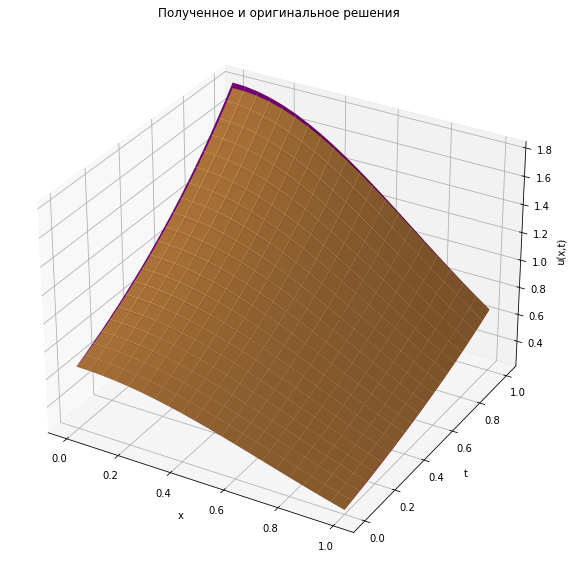

In [55]:
%matplotlib inline
def plot_u(X=X, T=T, order=1):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  Xs, Ts = np.meshgrid(X, T)
  u = solver_h(order=order)

  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u(x,t)')
  ax.title.set_text("Полученное и оригинальное решения")
  
  ax.plot_surface(Xs, Ts, solution(Xs, Ts), color="purple", alpha=1, label="Real")
  ax.plot_surface(Xs, Ts, u, color="yellow", alpha=0.5, label="Calc")

plot_u(order=1)

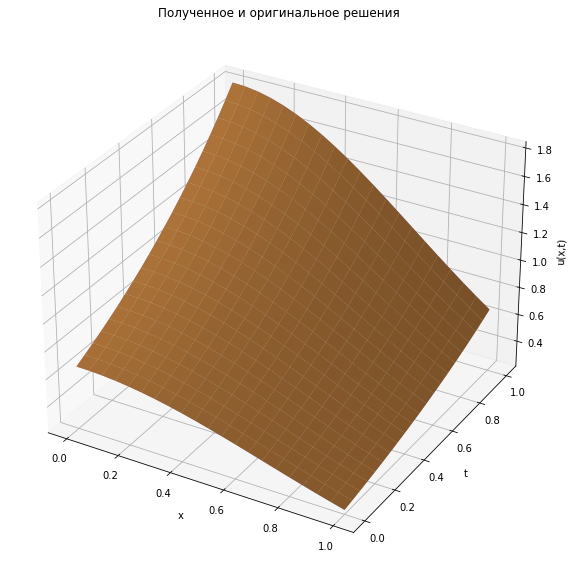

In [56]:
plot_u(order=2)

Оценим ошибки полученного решения:

In [57]:
def error_graph(X=X, T=T, order=1):
    Xs, Ts = np.meshgrid(X, T)
    fig = gr.Figure(data=[gr.Surface(z=np.abs(solution(Xs, Ts) - solver_h(order=order)), x=Xs, y=Ts)])
    fig.update_layout(scene = dict(
                        xaxis_title='x',
                        yaxis_title='t',
                        zaxis_title='|u(x,t)-u0(x,t)|'),
                        width=1000,
                        height=600,
                        margin=dict(r=10, b=20, l=10, t=60), 
                        title=f"Модуль ошибки в каждой точке сетки ({order} порядок точности производной)")
    fig.show()

In [58]:
error_graph(order=1)

In [59]:
error_graph(order=2)

Максимальная ошибка для данных $h$ и $\tau$:

In [60]:
def max_error(X=X, T=T, order=1):
    Xs, Ts = np.meshgrid(X, T)
    return np.max(np.abs(solution(Xs, Ts) - solver_h(X=X, T=T, order=order)))

In [61]:
print(f"Order 1 max error: {max_error(X=X, T=T, order=1)}")
print(f"Order 2 max error: {max_error(X=X, T=T, order=2)}")

Order 1 max error: 0.03862458063265217
Order 2 max error: 0.0007157917034337213


Далее приведена реализация построения 2D графиков на основе предыдущего слоя.

In [74]:
%matplotlib widget
def solver_h_2D(n=1, X=X, T=T, order=1):
    N = len(X)
    u = [phi(x) for x in X]
    for i in range(1, n):
        u = TridiagMatrixMethod(m=i-1, u=u, X=X, T=T, N=N, order=order, type="2D")
    # print(u)
    return u

def plot_2D(m=1, order=1):
    global X
    global T

    plt.clf()
    ax = plt.gca()
    ax.set_xlim([-h, l+h])
    ax.set_ylim([0, 2])
    
    u = solver_h_2D(n=m, order=order)
    real_u = [solution(x, T[m-1]) for x in X]

    plt.plot(X, u, label="Numerical Solution")
    plt.plot(X, real_u, label="Real Solution")

    plt.grid(True)
    plt.legend()
    try:
        plt.savefig(f"./graphs/t ={T[m-1]: .2f}, order = {order}.jpg")
    except Exception:
        print("An error occured while saving graph to /graph directory. Check if it's created.")
        
    plt.show() 
    

In [75]:
interact(plot_2D, m=(1, len(T), 1), order=(1, 2, 1))

interactive(children=(IntSlider(value=1, description='m', max=21, min=1), IntSlider(value=1, description='orde…

<function __main__.plot_2D(m=1, order=1)>